In [ ]:
!pip install scikit-learn


# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

# Load the Dataset

In [2]:
data = pd.read_csv('emp_abs.csv')

data.head()

,EmployeeNumber,Surname,GivenName,Gender,City,JobTitle,DepartmentName,StoreLocation,Division,Age,LengthService,AbsentHours,BusinessUnit
0,1,Gutierrez,Molly,F,Burnaby,Baker,Bakery,Burnaby,Stores,32.028816,6.018478,36.577306,Stores
1,2,Hardwick,Stephen,M,Courtenay,Baker,Bakery,Nanaimo,Stores,40.320902,5.532445,30.165072,Stores
2,3,Delgado,Chester,M,Richmond,Baker,Bakery,Richmond,Stores,48.822047,4.389973,83.807798,Stores
3,4,Simon,Irene,F,Victoria,Baker,Bakery,Victoria,Stores,44.599357,3.081736,70.020165,Stores
4,5,Delvalle,Edward,M,New Westminster,Baker,Bakery,New Westminster,Stores,35.697876,3.619091,0.000000,Stores


In [3]:
print(data.head())

   EmployeeNumber    Surname GivenName Gender             City JobTitle  \
0               1  Gutierrez     Molly      F          Burnaby    Baker   
1               2   Hardwick   Stephen      M        Courtenay    Baker   
2               3    Delgado   Chester      M         Richmond    Baker   
3               4      Simon     Irene      F         Victoria    Baker   
4               5   Delvalle    Edward      M  New Westminster    Baker   

  DepartmentName    StoreLocation Division        Age  LengthService  \
0         Bakery          Burnaby   Stores  32.028816       6.018478   
1         Bakery          Nanaimo   Stores  40.320902       5.532445   
2         Bakery         Richmond   Stores  48.822047       4.389973   
3         Bakery         Victoria   Stores  44.599357       3.081736   
4         Bakery  New Westminster   Stores  35.697876       3.619091   

   AbsentHours BusinessUnit  
0    36.577306       Stores  
1    30.165072       Stores  
2    83.807798       Store

# Drop Columns that are not for prediction

In [4]:
columns_to_drop = ['EmployeeNumber','Surname','GivenName','StoreLocation']
data = data.drop(columns = columns_to_drop)

# Seperate Target and Feature variable

In [5]:
X = data.drop(columns = 'AbsentHours')
Y = data['AbsentHours']

# Handling Categorical variables and Scaling

In [6]:
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['int64','float64']).columns

# Preprocessing (Impute missing values and Scale for Numerical Data)

In [7]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

#  Preprocessing (Impute missing values and Scale for Categorical Data)

In [8]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [9]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [10]:
X_preprocessed = preprocessor.fit_transform(X)

In [11]:
X_preprocessed = X_preprocessed.toarray()

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X_preprocessed, Y, test_size=0.2, random_state=42)

In [13]:
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (6668, 323)
Test set shape: (1668, 323)


# MLR

In [14]:
mlr = LinearRegression()
mlr.fit(X_train, Y_train)

LinearRegression()

In [15]:
Y_pred_mlr = mlr.predict(X_test)

In [16]:
mse_mlr = mean_squared_error(Y_test, Y_pred_mlr)
rmse_mlr = np.sqrt(mse_mlr)
r2_mlr = r2_score(Y_test, Y_pred_mlr)

In [17]:
print("MLR MSE:", mse_mlr)
print("MLR RMSE:", rmse_mlr)
print("MLR R-Square:", r2_mlr)

MLR MSE: 5.771517201177934e+23
MLR RMSE: 759705021780.0284
MLR R-Square: -2.5429147993982222e+20


# RFR

In [18]:
rfr = RandomForestRegressor(random_state=42)
rfr.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [19]:
Y_pred_rfr = rfr.predict(X_test)

In [20]:
mse_rfr = mean_squared_error(Y_test, Y_pred_rfr)
rmse_rfr = np.sqrt(mse_rfr)
r2_rfr = r2_score(Y_test, Y_pred_rfr)

In [21]:
print("RFR MSE:", mse_rfr)
print("RFR RMSE:", rmse_rfr)
print("RFR R-Square:", r2_rfr)

RFR MSE: 674.3419646388863
RFR RMSE: 25.96809512919433
RFR R-Square: 0.7028867623602479


# Apply PCA

In [22]:
pca = PCA(n_components=0.95)  # retain 95% of variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [23]:
print("Training set shape after PCA:", X_train_pca.shape)
print("Test set shape after PCA:", X_test_pca.shape)

Training set shape after PCA: (6668, 58)
Test set shape after PCA: (1668, 58)


# MLR with PCA

In [24]:
mlr_pca = LinearRegression()

In [25]:
mlr_pca.fit(X_train_pca, Y_train)

LinearRegression()

In [26]:
Y_pred_mlr_pca = mlr_pca.predict(X_test_pca)

In [27]:
mse_mlr_pca = mean_squared_error(Y_test, Y_pred_mlr_pca)
rmse_mlr_pca = np.sqrt(mse_mlr_pca)
r2_mlr_pca = r2_score(Y_test, Y_pred_mlr_pca)

In [28]:
print("MLR with PCA MSE:", mse_mlr_pca) 
print("MLR with PCA RMSE:", rmse_mlr_pca)
print("MLR with PCA R-Square:", r2_mlr_pca)

MLR with PCA MSE: 677.3043617338824
MLR with PCA RMSE: 26.025071791137915
MLR with PCA R-Square: 0.7015815382481163


# RFR with PCA

In [29]:
rfr_pca = RandomForestRegressor(random_state=42)
rfr_pca.fit(X_train_pca, Y_train)

RandomForestRegressor(random_state=42)

In [30]:
y_pred_rfr_pca = rfr_pca.predict(X_test_pca)

In [31]:
mse_rfr_pca = mean_squared_error(Y_test, y_pred_rfr_pca)
rmse_rfr_pca = np.sqrt(mse_rfr_pca)
r2_rfr_pca = r2_score(Y_test, y_pred_rfr_pca)

In [32]:
print("RFR with PCA MSE:", mse_rfr_pca)
print("RFR with PCA RMSE:", rmse_rfr_pca)
print("RFR with PCA R-Square:", r2_rfr_pca)

RFR with PCA MSE: 682.7758121417304
RFR with PCA RMSE: 26.12997918372172
RFR with PCA R-Square: 0.6991708320626698


In [33]:
results = {
    'Model': ['MLR', 'RFR', 'MLR with PCA', 'RFR with PCA'],
    'MSE': [mse_mlr, mse_rfr, mse_mlr_pca, mse_rfr_pca],
    'RMSE': [rmse_mlr, rmse_rfr, rmse_mlr_pca, rmse_rfr_pca],
    'R-Square': [r2_mlr, r2_rfr, r2_mlr_pca, r2_rfr_pca]
}

In [34]:
results_df = pd.DataFrame(results)
print(results_df)

          Model           MSE          RMSE      R-Square
0           MLR  5.771517e+23  7.597050e+11 -2.542915e+20
1           RFR  6.743420e+02  2.596810e+01  7.028868e-01
2  MLR with PCA  6.773044e+02  2.602507e+01  7.015815e-01
3  RFR with PCA  6.827758e+02  2.612998e+01  6.991708e-01


# Visualization

In [35]:
def plot_actual_vs_predicted(y_test, y_pred, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.3)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(title)
    plt.show()

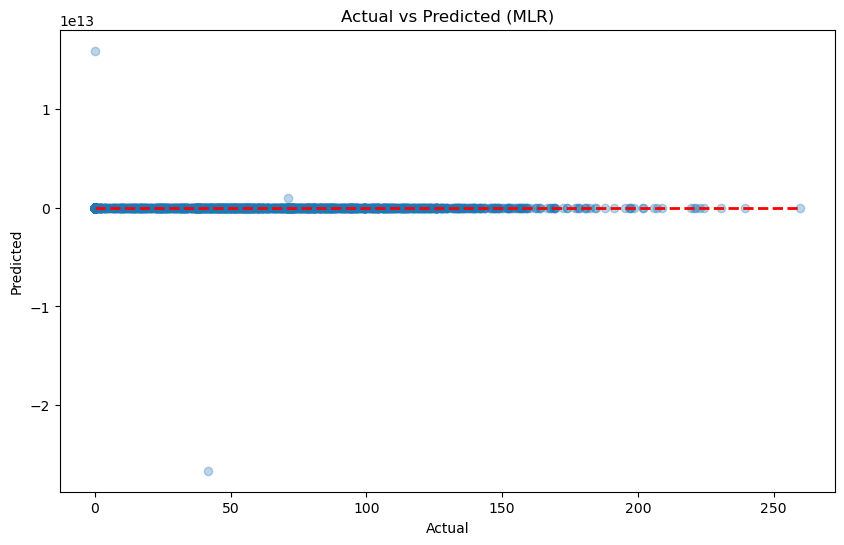

In [36]:
plot_actual_vs_predicted(Y_test, Y_pred_mlr, "Actual vs Predicted (MLR)")

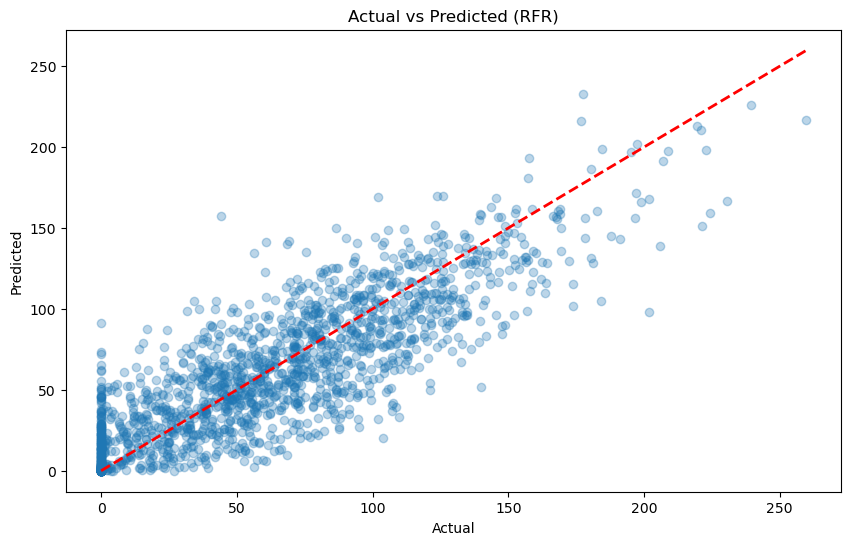

In [37]:
plot_actual_vs_predicted(Y_test, Y_pred_rfr, "Actual vs Predicted (RFR)")

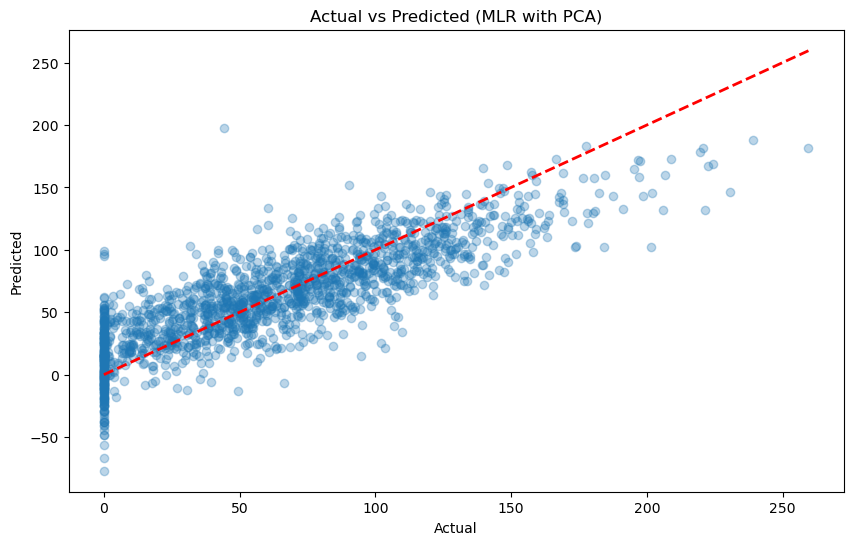

In [38]:
plot_actual_vs_predicted(Y_test, Y_pred_mlr_pca, "Actual vs Predicted (MLR with PCA)")

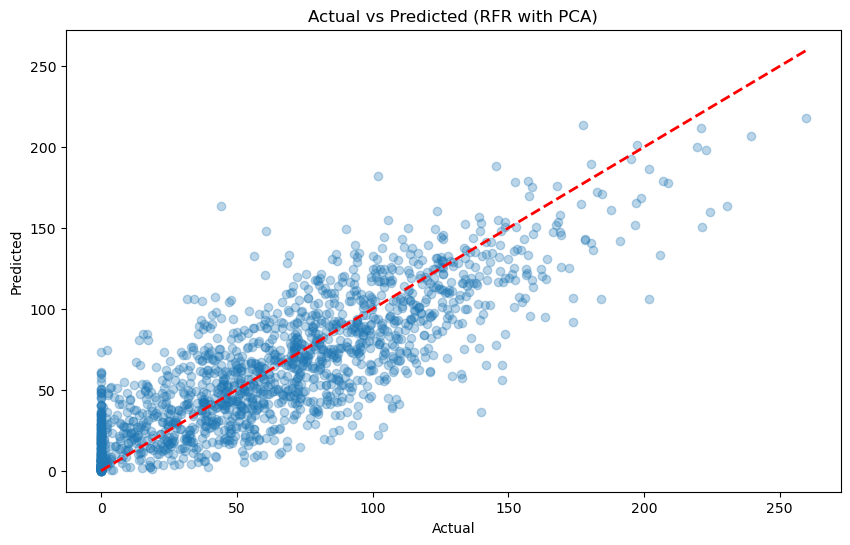

In [39]:
plot_actual_vs_predicted(Y_test, y_pred_rfr_pca, "Actual vs Predicted (RFR with PCA)")

In [40]:
def plot_feature_importances(model, feature_names, title):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.bar(range(len(importances)), importances[indices], align='center')
    plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
    plt.tight_layout()
    plt.show()

In [41]:
onehot_feature_names = preprocessor.transformers_[1][1]['onehot'].get_feature_names_out(categorical_features)
all_feature_names = np.concatenate((numerical_features, onehot_feature_names))

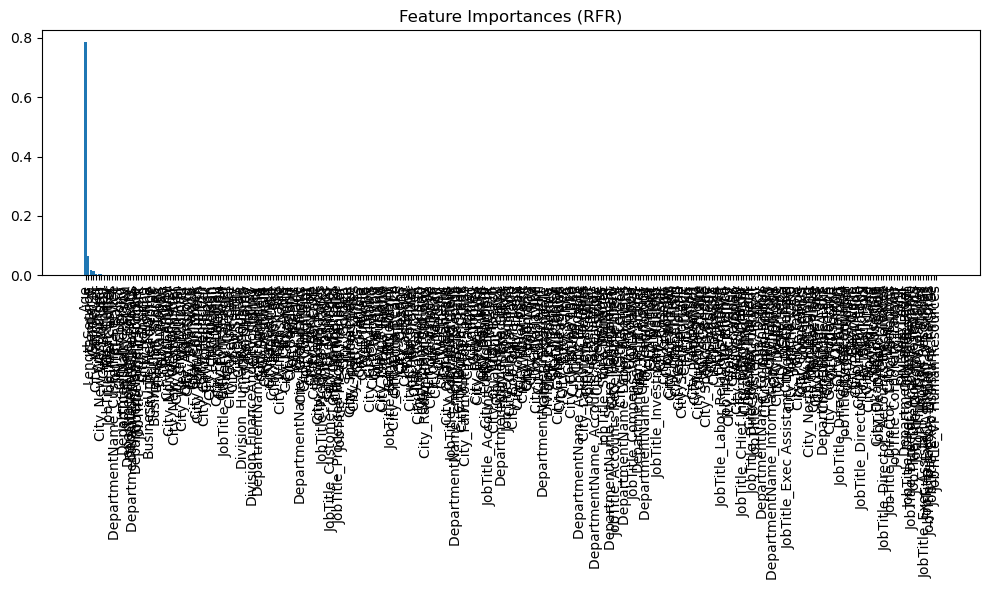

In [42]:
plot_feature_importances(rfr, all_feature_names, "Feature Importances (RFR)")

# Hyperparameter Tuning

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

In [45]:
rfr = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rfr, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, error_score='raise')

In [46]:
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=5, error_score='raise',
             estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [47]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [48]:
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Best Score: 0.7631649920033532


# Cross-Validation

In [55]:
from sklearn.model_selection import train_test_split, cross_val_score

data = {
    'EmployeeNumber': range(1, 11),
    'Surname': ['A']*10,
    'GivenName': ['B']*10,
    'Gender': ['M', 'F']*5,
    'City': ['City1', 'City2']*5,
    'JobTitle': ['Title1', 'Title2']*5,
    'DepartmentName': ['Dept1', 'Dept2']*5,
    'StoreLocation': ['Loc1', 'Loc2']*5,
    'Division': ['Div1', 'Div2']*5,
    'Age': [25, 30, 22, 40, 35, 45, 26, 36, 28, 32],
    'LengthService': [1, 5, 2, 10, 3, 12, 4, 11, 6, 8],
    'AbsentHours': [5, 10, 3, 8, 6, 7, 5, 6, 4, 10],
    'BusinessUnit': ['Unit1', 'Unit2']*5
}

df = pd.DataFrame(data)

df = df.drop(['EmployeeNumber', 'Surname', 'GivenName'], axis=1)

In [56]:
X = df.drop('AbsentHours', axis=1)
y = df['AbsentHours']

In [57]:
X_preprocessed = preprocessor.fit_transform(X)

In [58]:
categorical_features = ['Gender', 'City', 'JobTitle', 'DepartmentName', 'StoreLocation', 'Division', 'BusinessUnit']
numerical_features = ['Age', 'LengthService']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

In [59]:
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_preprocessed_pca = pca.fit_transform(X_preprocessed)

In [60]:
mlr = LinearRegression()
rfr = RandomForestRegressor()

# Validation for MLR

In [61]:
cv_scores_mlr = cross_val_score(mlr, X_preprocessed, y, cv=5, scoring='neg_mean_squared_error')
print("MLR Cross-Validation MSE:", -cv_scores_mlr.mean())
print("MLR Cross-Validation RMSE:", (-cv_scores_mlr.mean())**0.5)

MLR Cross-Validation MSE: 1.9734424400049395
MLR Cross-Validation RMSE: 1.4047926679780685


# Validation for RFR

In [62]:
cv_scores_rfr = cross_val_score(rfr, X_preprocessed, y, cv=5, scoring='neg_mean_squared_error')
print("RFR Cross-Validation MSE:", -cv_scores_rfr.mean())
print("RFR Cross-Validation RMSE:", (-cv_scores_rfr.mean())**0.5)

RFR Cross-Validation MSE: 1.9377599999999997
RFR Cross-Validation RMSE: 1.392034482331526


# Validation for MLR with PCA

In [63]:
cv_scores_mlr_pca = cross_val_score(mlr, X_preprocessed_pca, y, cv=5, scoring='neg_mean_squared_error')
print("MLR with PCA Cross-Validation MSE:", -cv_scores_mlr_pca.mean())
print("MLR with PCA Cross-Validation RMSE:", (-cv_scores_mlr_pca.mean())**0.5)

MLR with PCA Cross-Validation MSE: 3.755756714323674
MLR with PCA Cross-Validation RMSE: 1.9379774803448242


# Validation for RFR with PCA

In [64]:
cv_scores_rfr_pca = cross_val_score(rfr, X_preprocessed_pca, y, cv=5, scoring='neg_mean_squared_error')
print("RFR with PCA Cross-Validation MSE:", -cv_scores_rfr_pca.mean())
print("RFR with PCA Cross-Validation RMSE:", (-cv_scores_rfr_pca.mean())**0.5)

RFR with PCA Cross-Validation MSE: 3.5134899999999996
RFR with PCA Cross-Validation RMSE: 1.8744305802029584


In [67]:
print(f"Length of X: {len(X)}")
print(f"Length of Y: {len(Y)}")

Length of X: 10
Length of Y: 8336


In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

rfr = RandomForestRegressor(random_state=42)

rfr.fit(X_train, y_train)

ValueError: Found input variables with inconsistent numbers of samples: [10, 8336]

In [65]:
feature_importances = rfr.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance from Random Forest Regressor')
plt.xticks(rotation=45)
plt.show()

In [ ]:
print(importance_df)